I a little bit of trouble installing altair, there's more than just `pip install altair`

`pip install -U altair vega_datasets notebook vega3`

https://vega.github.io/vega/  
http://vallandingham.me/altair_intro.html

In [4]:
import altair as alt
from vega_datasets import data
import pandas as pd

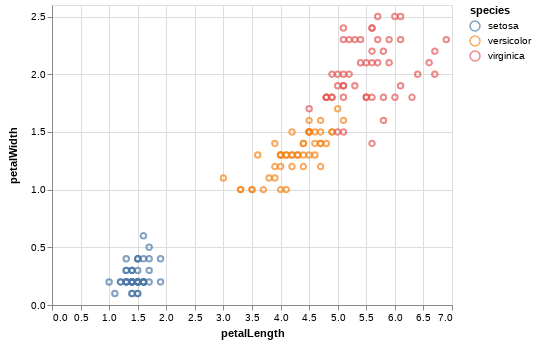

In [3]:
# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

In [51]:
cars = alt.load_dataset('cars')
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [50]:
alt.Chart(cars).mark_point()

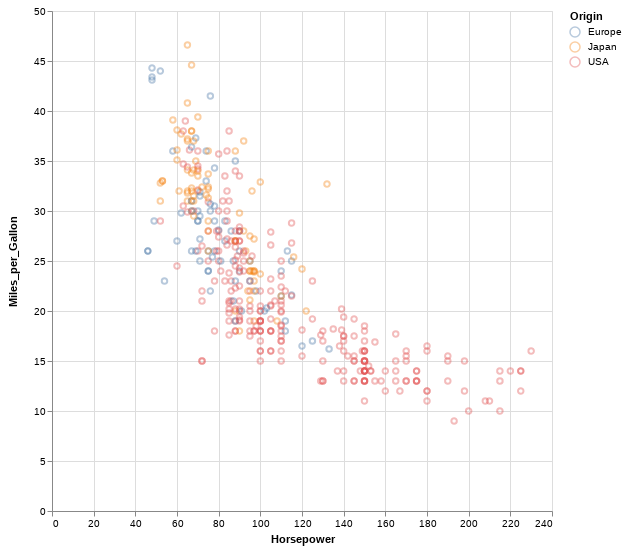

In [40]:
alt.Chart(
    cars,
    width=500,
    height=500).mark_point(opacity=.4).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin'
)

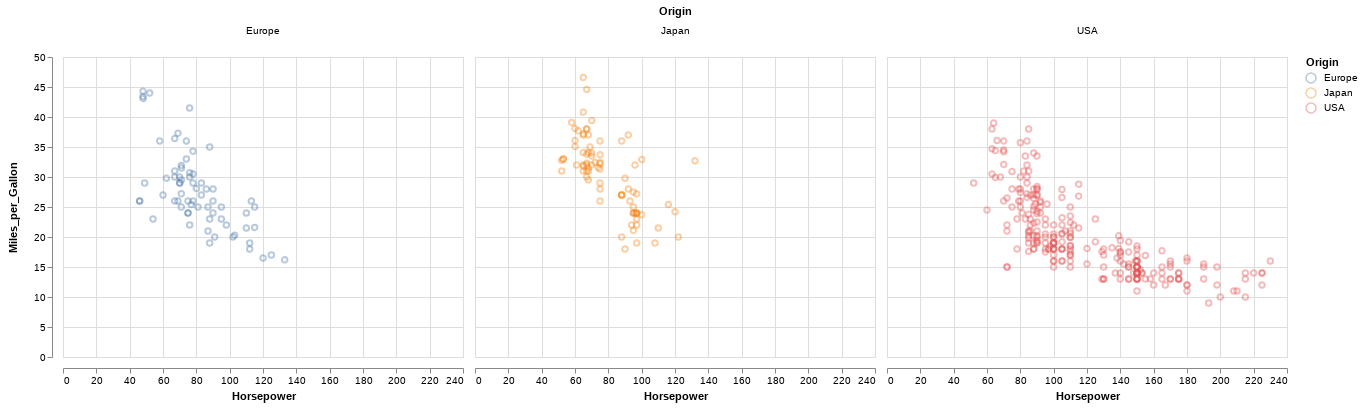

In [43]:
alt.Chart(
    cars
).mark_point(opacity=.4).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin'
).facet(
    column='Origin'
).interactive()

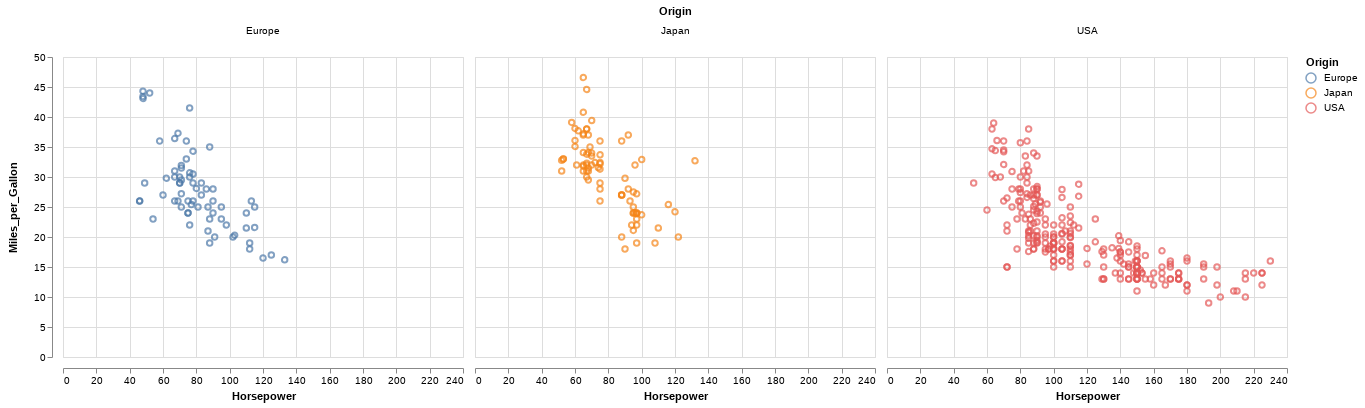

In [44]:
brush = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray')),
).properties(
    selection=brush
).facet(column='Origin:N')

In [48]:
pointer = alt.selection_single(on='mouseover', nearest=True, empty='none')

base = alt.Chart().encode(
    x='Miles_per_Gallon', y='Horsepower'
)

chart = alt.layer(
    base.mark_point().properties(selection=pointer).encode(color='Origin'),
    base.mark_text(dx=8, dy=3, align='left').encode(text=alt.condition(pointer, 'Name', alt.value(''))),
    data=cars
)

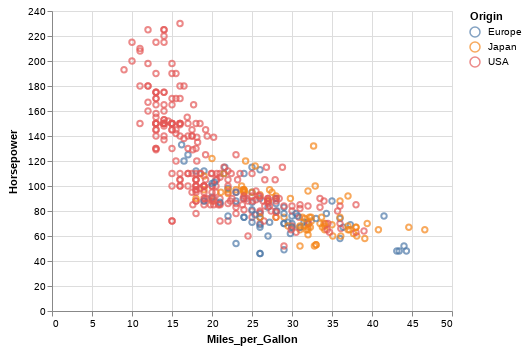

In [49]:
chart